### 使用KMnist数据集 训练神经网络模型
    要求：使用pytorch构建神经网络,实现KMNIST数据集的训练
    分析：
        1. KMNIST数据集 
                训练集60000张，测试集10000张 
                每张图片大小28*28 
                分10类-对应数字 0 到 9 这 10 个手写数字类别
        2. 构建神经网络
                输入层：(60000, 784)
                隐藏层：(784, 32)
                输出层：(, 10)
        思路：① 60000 张图片组成的训练集对模型进行训练，不断迭代优化模型的参数，获得一组能使模型在整个训练集上
                表现最优的全局参数；
              ② 训练过程中，每张输入的图片数据会依次经过隐藏层的所有 32 个神经元进行特征提取和转换；
              ③ 隐藏层的 32 个神经元的输出结果会作为输入传递到输出层，最终由输出层输出 10 个类别的预测概率，
                对应数字 0 到 9 这 10 个手写数字类别。

    步骤：
        1. 数据预处理
        2. 构建模型
        3. 构建损失函数
        4. 构建优化器
        5. 训练模型
        6. 预测数据

####  1. 数据预处理

In [ ]:
# 导包
import torch
import torch.nn as nn
from torchvision.datasets import KMNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [ ]:
# 参数初始化
BATCH_SIZE = 50
lr = 0.01
epochs = 20

In [7]:
# 加载训练数据集
train_data = KMNIST(root='./kdata', train=True, download=True, transform=ToTensor())
# 拆分训练数据集
train_dl = DataLoader(train_data, batch_size=BATCH_SIZE)

# 加载测试数据集
test_data = KMNIST(root='./kdata', train=False, download=True, transform=ToTensor())
# 拆分测试数据集
test_dl = DataLoader(test_data, batch_size=BATCH_SIZE)

(1, 28, 28)


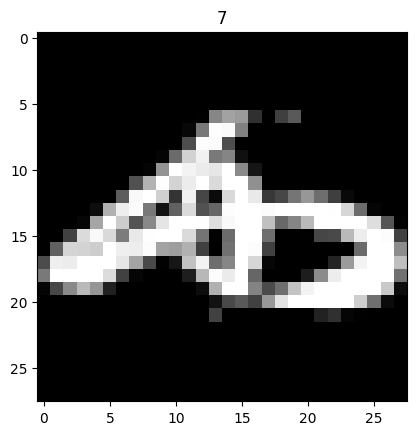

In [15]:
import matplotlib.pyplot as plt 
# train_data 每个图片对象 元组（像素-tensor，标签）
img, label = train_data[1]
print(img.numpy().shape)
plt.imshow(img.numpy().squeeze(), cmap='gray')
plt.title(label)
plt.show()

### 2.构建模型

In [16]:
model = nn.Sequential(
    nn.Linear(784, 32),
    nn.Sigmoid(),
    nn.Linear(32, 10)
)

### 3. 构建损失函数

In [17]:
loss_fn = nn.CrossEntropyLoss()

### 4.构建优化器

In [18]:
optimizer = torch.optim.SGD(model.parameters(), lr)

### 5.训练模型

In [19]:
for epoch in range(epochs):
    for x, y in train_dl:
        y_hat = model(x.reshape(-1, 784))
        loss = loss_fn(y_hat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"epoch: {epoch}  loss: {loss.item()}")

epoch: 0  loss: 1.9509875774383545
epoch: 1  loss: 1.575406551361084
epoch: 2  loss: 1.2739917039871216
epoch: 3  loss: 1.065065860748291
epoch: 4  loss: 0.925179660320282
epoch: 5  loss: 0.8280743360519409
epoch: 6  loss: 0.7580419778823853
epoch: 7  loss: 0.7062917351722717
epoch: 8  loss: 0.6673507690429688
epoch: 9  loss: 0.6374500393867493
epoch: 10  loss: 0.6138982772827148
epoch: 11  loss: 0.5947931408882141
epoch: 12  loss: 0.5788288712501526
epoch: 13  loss: 0.5651278495788574
epoch: 14  loss: 0.5530961751937866
epoch: 15  loss: 0.5423203110694885
epoch: 16  loss: 0.5325025916099548
epoch: 17  loss: 0.5234242677688599
epoch: 18  loss: 0.5149215459823608
epoch: 19  loss: 0.5068703293800354


### 6. 预测数据

In [20]:
# 总样本数
total = 0
# 正确分类数
correct = 0

with torch.no_grad():
    for x, y in test_dl:
        y_hat = model(x.reshape(-1, 784)) # 每个图片10个类别的概率值组成
        max_val, max_idx = torch.max(y_hat, 1) # 找到概率值最大的类别索引
        total += y.size(0)
        correct += (max_idx == y).sum().item() # 统计正确分类的个数
print(f'Accuracy: {correct / total}')

Accuracy: 0.6994
